In [16]:
import pandas as pd
import numpy as np

df = pd.read_excel("crop_yield_data_sheet.xlsx")

In [17]:
df

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230.0,80.0,28,80.0,24.0,20.0,12.0
1,480.0,60.0,36,70.0,20.0,18.0,8.0
2,1250.0,75.0,29,78.0,22.0,19.0,11.0
3,450.0,65.0,35,70.0,19.0,18.0,9.0
4,1200.0,80.0,27,79.0,22.0,19.0,11.0
...,...,...,...,...,...,...,...
104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df.replace('', pd.NA, inplace=True)

df.dropna(how='all', inplace=True)

df.reset_index(drop=True, inplace=True)

df = df.drop(index=99,axis = 0)

In [19]:
df.head()

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230.0,80.0,28,80.0,24.0,20.0,12.0
1,480.0,60.0,36,70.0,20.0,18.0,8.0
2,1250.0,75.0,29,78.0,22.0,19.0,11.0
3,450.0,65.0,35,70.0,19.0,18.0,9.0
4,1200.0,80.0,27,79.0,22.0,19.0,11.0


In [20]:
df.tail()

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
94,1250.0,77.0,28,78.0,23.0,20.0,9.0
95,425.0,60.0,39,65.0,19.0,17.0,6.5
96,1220.0,79.0,28,77.0,23.0,21.0,10.5
97,480.0,65.0,36,68.0,21.0,16.0,7.0
98,1230.0,80.0,28,80.0,24.0,20.0,12.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rain Fall (mm)  99 non-null     float64
 1   Fertilizer      99 non-null     float64
 2   Temperatue      99 non-null     object 
 3   Nitrogen (N)    99 non-null     float64
 4   Phosphorus (P)  99 non-null     float64
 5   Potassium (K)   99 non-null     float64
 6   Yeild (Q/acre)  99 non-null     float64
dtypes: float64(6), object(1)
memory usage: 5.5+ KB


In [22]:
df.describe()

,Rain Fall (mm),Fertilizer,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,849.797980,67.808081,70.737374,21.131313,18.060606,9.050505
std,400.042676,10.028202,6.677079,1.951695,1.817254,1.965902
min,400.000000,50.000000,59.000000,18.000000,15.000000,5.500000
25%,450.000000,60.000000,65.000000,19.500000,16.000000,7.000000
50%,1150.000000,70.000000,71.000000,21.000000,19.000000,9.000000
75%,1237.500000,77.000000,77.000000,23.000000,19.000000,11.000000
max,1300.000000,80.000000,80.000000,25.000000,22.000000,12.000000


In [23]:
df.isnull().sum()

Rain Fall (mm)    0
Fertilizer        0
Temperatue        0
Nitrogen (N)      0
Phosphorus (P)    0
Potassium (K)     0
Yeild (Q/acre)    0
dtype: int64

In [24]:
df['Temperatue'] = df['Temperatue'].astype('int64')

In [25]:
x = df.copy().drop(columns=['Yeild (Q/acre)'],axis = 1)
y = df['Yeild (Q/acre)']

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Mean Squared Error: 0.49686174280125217
R-squared Score: 0.8938754787769319


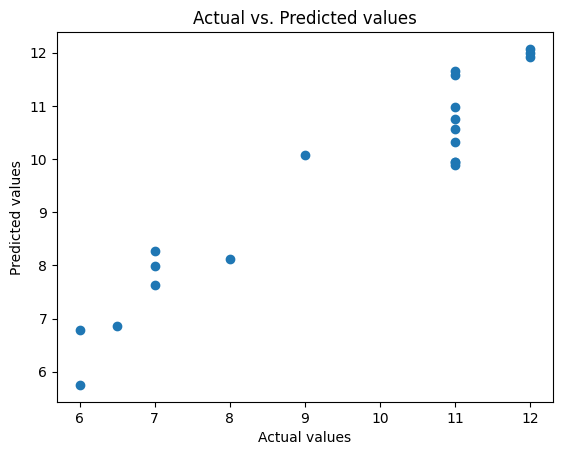

In [27]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

model_params = {
    'objective': 'reg:squarederror',
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 3,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'enable_categorical': 'True'
}

model = XGBRegressor(**model_params)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs. Predicted values")
plt.show()